In [52]:
library(tidyverse)
library(gridExtra)
library(showtext)

In [53]:
# Plot Settings

# Font
showtext_auto()
font_add("Helvetica", regular = "./Fonts/Helvetica/Helvetica.ttf")

# Color Palette
group_colors <- c(
  "G1" = "#33a02c",
  "G2" = "#b2df8a",
  "G3" = "#0162a7",
  "G4" = "#a6cee3",
  "G5" = "#e31a1c",
  "G6" = "#fb9a99"
)

color_wurm <- c(
                'Juvenile (ohne Clitellum)' = "#A3BF14",
                'Streuebewohner (Epigäische Arten)' = "#F0CC48",
                'Horizontalbohrer (Endogäische Arten)' = "#746537",
                'Vertikalbohrer (Anözische Arten)' = "#573F2A"
                )

group_names <- c(
  "G1" = "Baumann, Hirzel",
  "G2" = "Stiftung Bühl, Wädenswil",
  "G3" = "Winter, Wädenswil",
  "G4" = "Wädichörbli, Samstagern",
  "G5" = "Hof Froh Ussicht, Samstagern",
  "G6" = "L&F Betrieb ZHAW, Wädenswil"
)

plot_settings = 
    theme(
        text = element_text(family = "Helvetica"),
        title = element_text(size = 20),
        axis.title = element_text(size = 28),
        axis.text = element_text(size = 20),
        strip.text = element_text(size = 20),
        legend.title = element_text( size = 28),
        legend.text = element_text(size = 20),
        legend.position = "bottom",
        panel.background = element_blank(),
        panel.grid.major = element_line(color = "lightgrey"),
        # panel.grid.minor = element_line(color = "lightgrey")
    )


## Bite Lamina

In [54]:
# Einlesen der Daten und Umwandlung in %
data <- read.csv("./data/raw/bitelamina/bitelamina.csv") %>% 
    mutate(
        Gruppe = Gruppe %>% as.factor(),
        Wiederholung = Wiederholung %>% as.factor(),
        Streifen = Streifen %>% as.factor(),
        Wert = Wert*50 %>% as.numeric()
    )

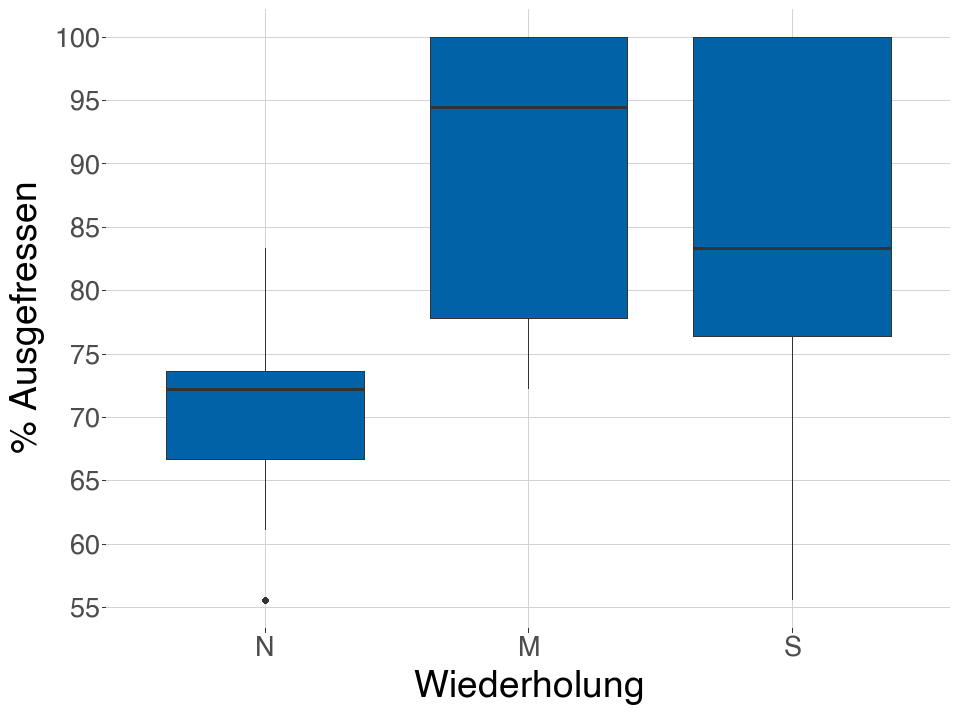

In [55]:
# Boxplot Gruppe 3
ratio <- list(width = 8, height = 6)
options(repr.plot.width = ratio$width, repr.plot.height = ratio$height, units = "cm", dpi = 300)

# Mittelwert und SD über alle 3 Wiederholungen
data %>% filter(Gruppe == "G3") %>% summarise(mean = mean(Wert), sd = sd(Wert)) -> sumary


data %>% 
filter(Gruppe == "G3") %>%
mutate(Wiederholung = recode(Wiederholung, "W1" = "N", "W2" = "M", "W3" = "S")) %>%
group_by(Wiederholung, Tiefe) %>% 
summarise(mean = mean(Wert), sd = sd(Wert), .groups = "drop") %>%
    ggplot(aes(x = Wiederholung, y = mean)) +
    geom_boxplot(fill="#0162a7") +
    plot_settings +
        labs(
            x = "Wiederholung",
            y = "% Ausgefressen"
            )+
        scale_y_continuous(breaks = seq(55, 100, by = 5))
    

ggsave("./plots/G3_Boxplot.png", width = ratio$width, height = ratio$height, units = "cm", dpi = 300)

In [56]:
# standardabweichung nach Gruppe wie im excel
data %>% 
filter(Gruppe == "G6") %>%
group_by(Wiederholung, Streifen) %>%
summarise(sd = sd(Wert), mean = mean(Wert), .groups = "drop") %>%
group_by(Wiederholung) %>%
summarise(sd = sd(mean))

Wiederholung,sd
<fct>,<dbl>
W1,21.75064
W2,19.68860
W3,15.91740


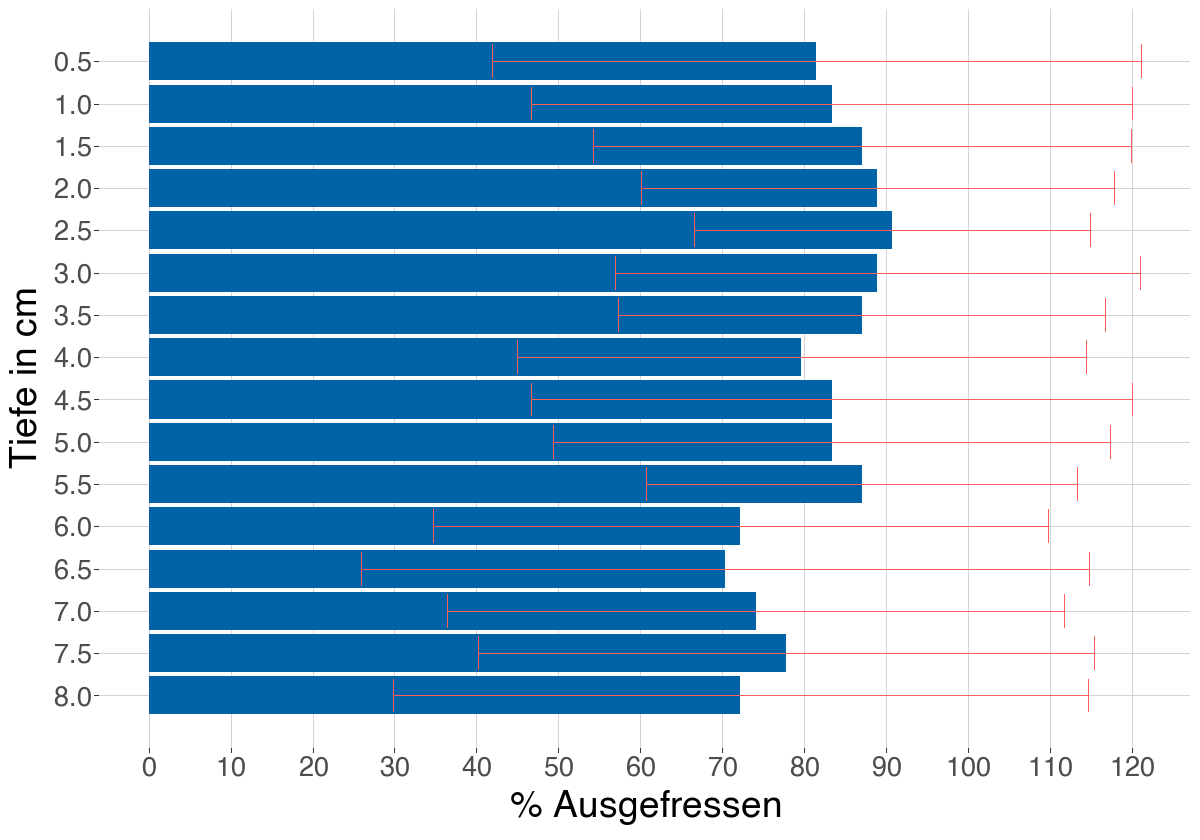

In [57]:
# Barplot Gruppe 3

Auswahl_Gruppe <- "G3"

ratio <- list(width = 10, height = 7)
options(repr.plot.width = ratio$width, repr.plot.height = ratio$height, units = "cm", dpi = 300)

data %>% 
filter(Gruppe == Auswahl_Gruppe) %>%
group_by(Tiefe) %>%
summarise(mean = mean(Wert), sd = sd(Wert)) %>%
    ggplot()+
    geom_bar( aes(x=Tiefe, y=mean), stat="identity", fill="#0162a7") +
    geom_errorbar(
        aes(x=Tiefe, ymin=mean-sd, ymax=mean+sd), 
        width=0.4, colour="#ff5c5c", size=0.5
    ) +
    plot_settings +
        coord_flip() +
        labs(
        x = "Tiefe in cm",
        y = "% Ausgefressen"
        )+
        scale_y_continuous(breaks = seq(0, 125, by = 10)) +
        scale_x_reverse(breaks = seq(8, 0.5, by = -0.5))

ggsave("./plots/G3_Barplot.png", width = ratio$width, height = ratio$height, units = "cm", dpi = 300)

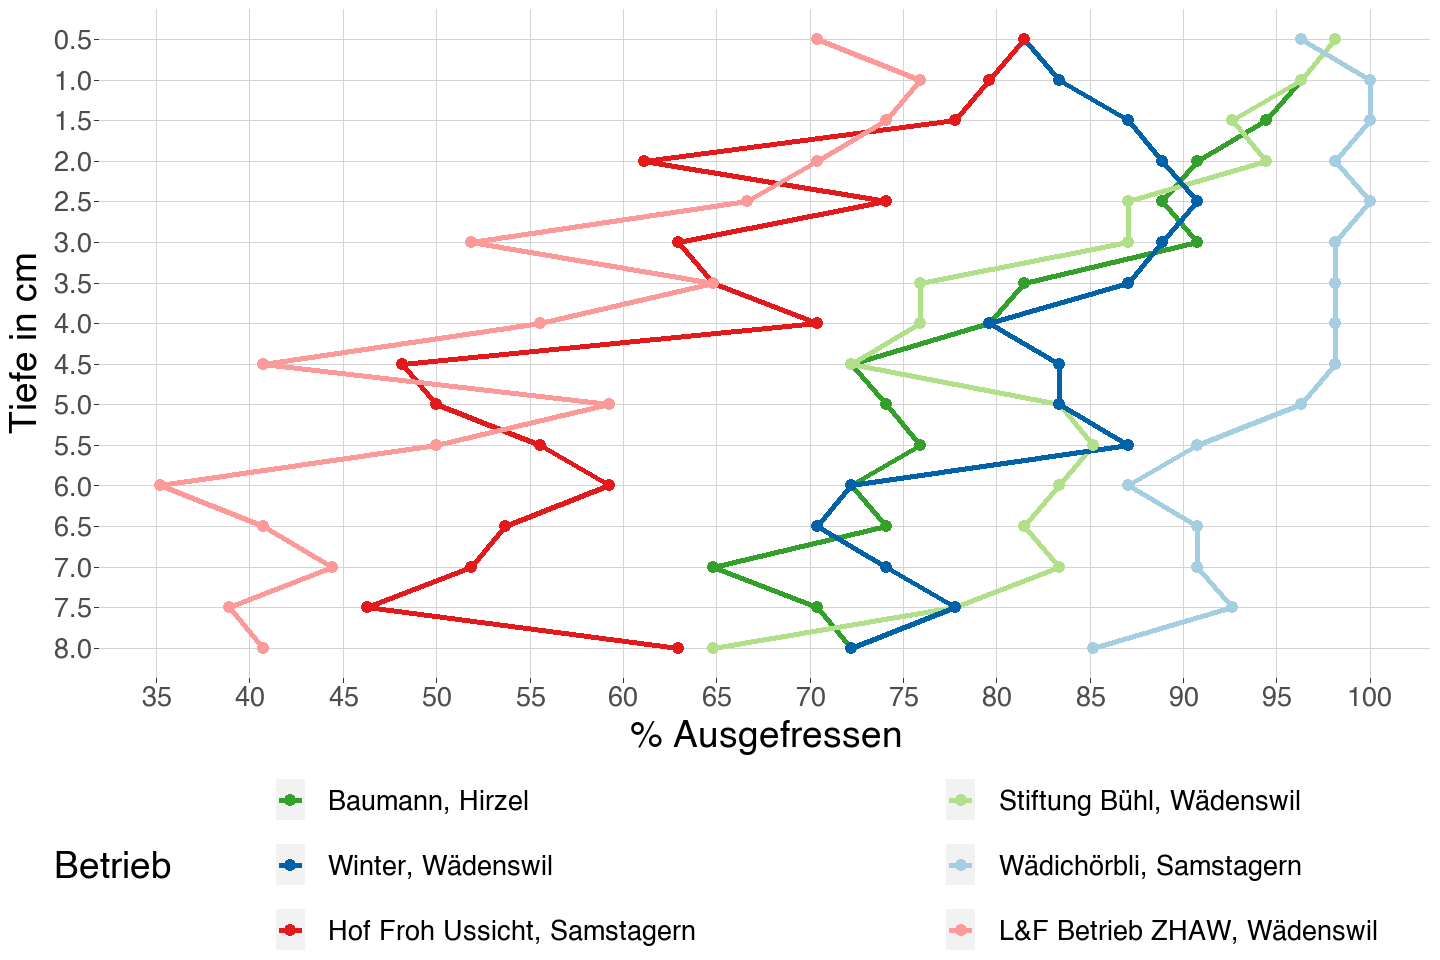

In [58]:
# Lineplot All

ratio <- list(width = 12, height = 8)
options(repr.plot.width = ratio$width, repr.plot.height = ratio$height, units = "cm", dpi = 300)

data %>% 
group_by(Gruppe, Tiefe) %>%
summarise(mean = mean(Wert), sd = sd(Wert), .groups = "drop") %>%
    ggplot(aes(x = Tiefe, y = mean))+
    geom_line(aes(color = Gruppe), size = 1.5) +
    geom_point(aes(color = Gruppe), size = 3) +
    plot_settings +
        guides(color = guide_legend(nrow = length(group_names)/2 , byrow = TRUE)) +
        scale_color_manual(values = group_colors, labels = group_names, name = "Betrieb") +
        scale_x_reverse(breaks = seq(8, 0.5, by = -0.5)) +
        scale_y_continuous(breaks = seq(30, 100, by = 5)) +
        coord_flip() +
        labs(
            x = "Tiefe in cm",
            y = "% Ausgefressen"
            ) +
            theme(legend.margin = margin(r = -6, l = -3, unit = "cm"))

ggsave("./plots/All_Line.png", width = ratio$width, height = ratio$height, units = "cm", dpi = 300)

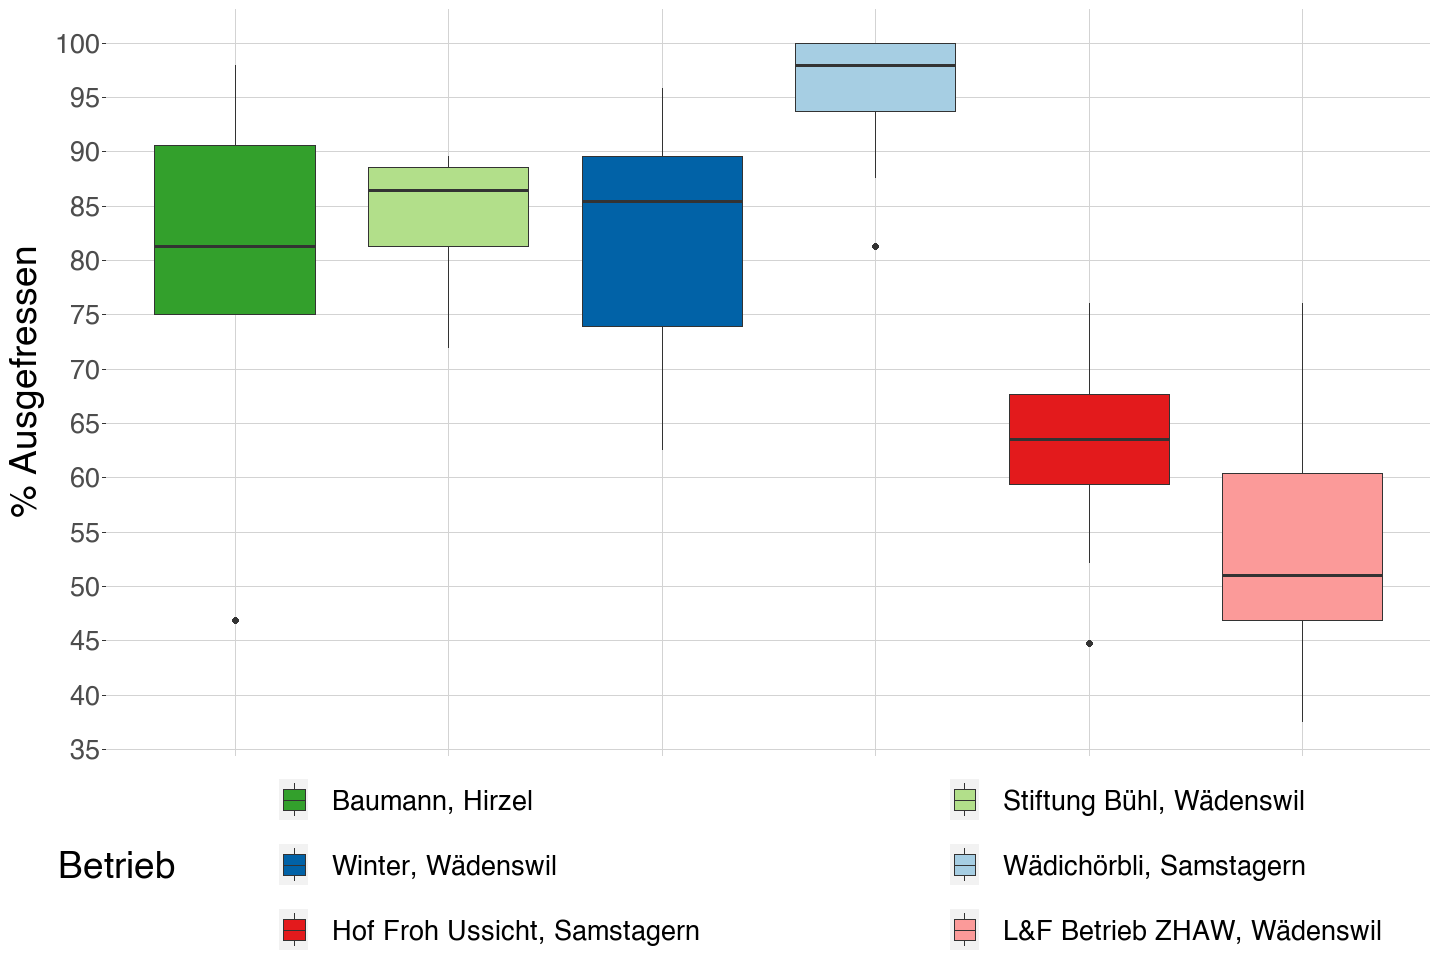

In [59]:
# Boxplot All

ratio <- list(width = 12, height = 8)
options(repr.plot.width = ratio$width, repr.plot.height = ratio$height, units = "cm", dpi = 300)

data %>% 
group_by(Gruppe, Streifen) %>%
summarise(mean = mean(Wert), sd = sd(Wert), .groups = "drop") %>%
    ggplot(aes(x=Gruppe, y=mean)) +
    geom_boxplot(aes(fill = Gruppe)) +
    plot_settings +
        guides(fill = guide_legend(nrow = length(group_names)/2 , byrow = TRUE)) +
        scale_fill_manual(values = group_colors, labels = group_names, name = "Betrieb") +
        scale_y_continuous(breaks = seq(35, 100, by = 5)) +
        labs(y = "% Ausgefressen") +
        theme(
            axis.title.x = element_blank(),
            axis.text.x = element_blank(),
            axis.ticks.x = element_blank()
        ) +
        theme(legend.margin = margin(r = -6, l = -3, unit = "cm"))

ggsave("./plots/All_Box.png", width = ratio$width, height = ratio$height, units = "cm", dpi = 300)

### Regenwurm

In [60]:
# Einlesen der Daten und umwandeln der daten
data_wurm <- read.csv("./data/raw/wurm/wurm.csv") %>%
    pivot_longer(cols = -c(1:2), names_to = "Gruppe", values_to = "Messwert") %>%
    mutate(
        pro_m2 = round(Messwert/0.09,2),
        Art = Art %>% as.factor() %>% fct_inorder(),
        Einheit = Einheit %>% as.factor(),
        Gruppe = Gruppe %>% as.factor()
    )

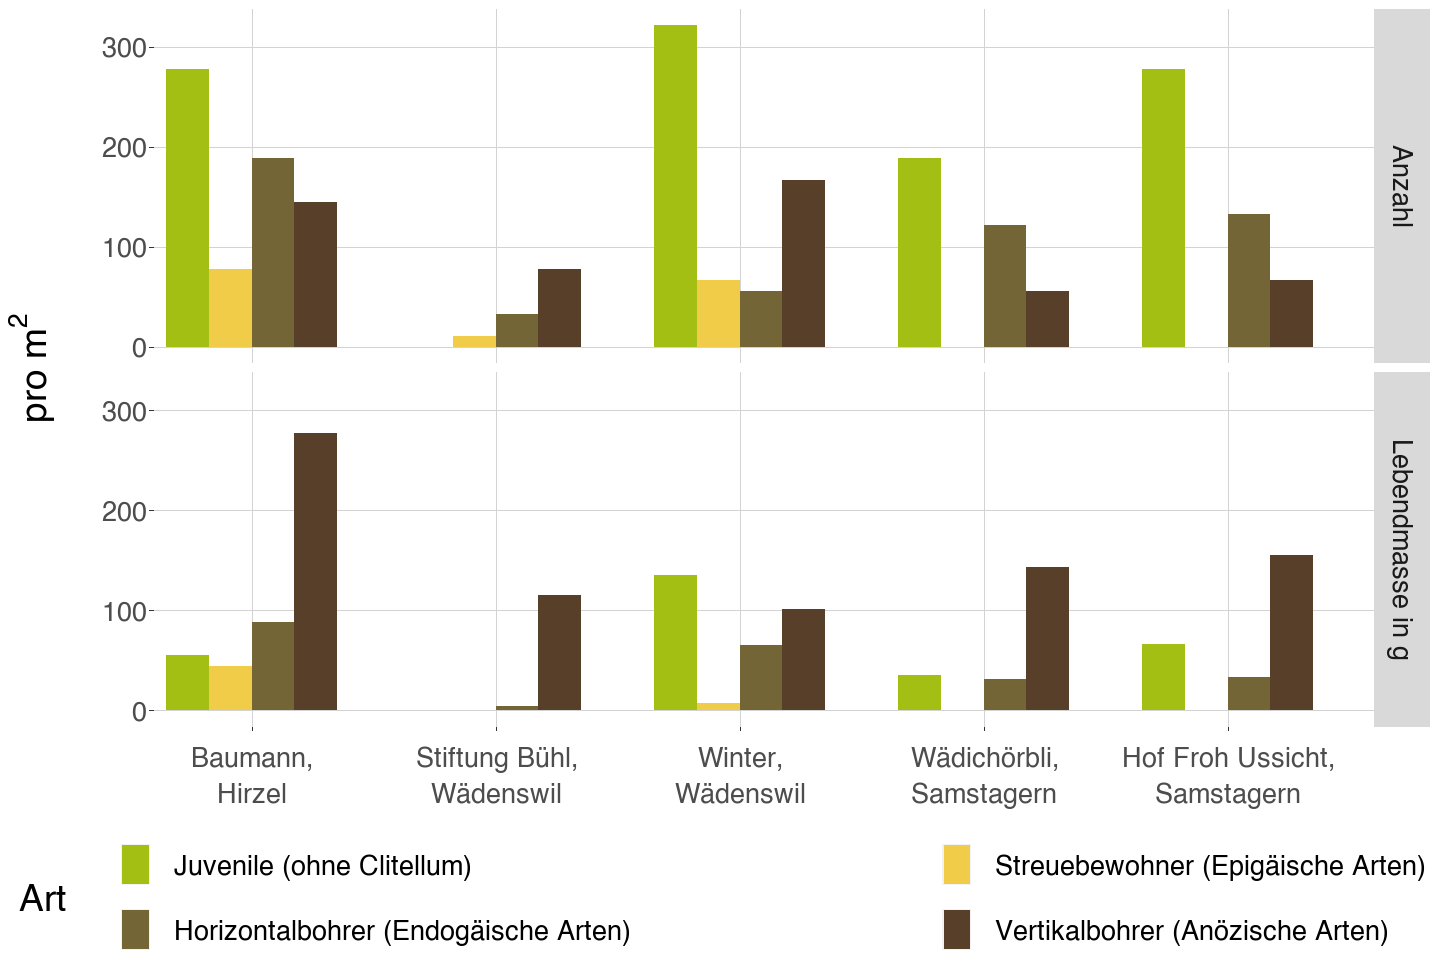

In [61]:
ratio <- list(width = 12, height = 8)
options(repr.plot.width = ratio$width, repr.plot.height = ratio$height, units = "cm", dpi = 300)

new_labels_facet <- c("Anzahl" = "Anzahl", "Lebendmasse_g" = "Lebendmasse in g")

data_wurm %>%
    ggplot(aes(x = Gruppe, y = pro_m2)) +
    geom_bar(
        aes(fill = Art), 
        position="dodge", 
        width = 0.7, 
        stat = "identity"
    ) +
    scale_fill_manual(values = color_wurm) +
    facet_grid(
        rows=vars(Einheit), 
        labeller = labeller(Einheit = new_labels_facet)
    ) +
    scale_x_discrete(
        labels = group_names %>% str_replace_all(", ", ",\n"),
        expand = expansion(mult = c(0.1, 0.15))
    ) +
    plot_settings +
        labs(x = NULL) +
        labs(y = expression("pro m"^2))  +
        guides(fill = guide_legend(nrow = 2 , byrow = TRUE)) +
        theme(
            legend.margin = margin(t = 20), 
            axis.text.x = element_text(margin = margin(t = 10))
        )+
        theme(legend.margin = margin(r = -8, l = -4, unit = "cm"))

ggsave("./plots/Wurm_All_Box.png", width = ratio$width, height = ratio$height, units = "cm", dpi = 300)

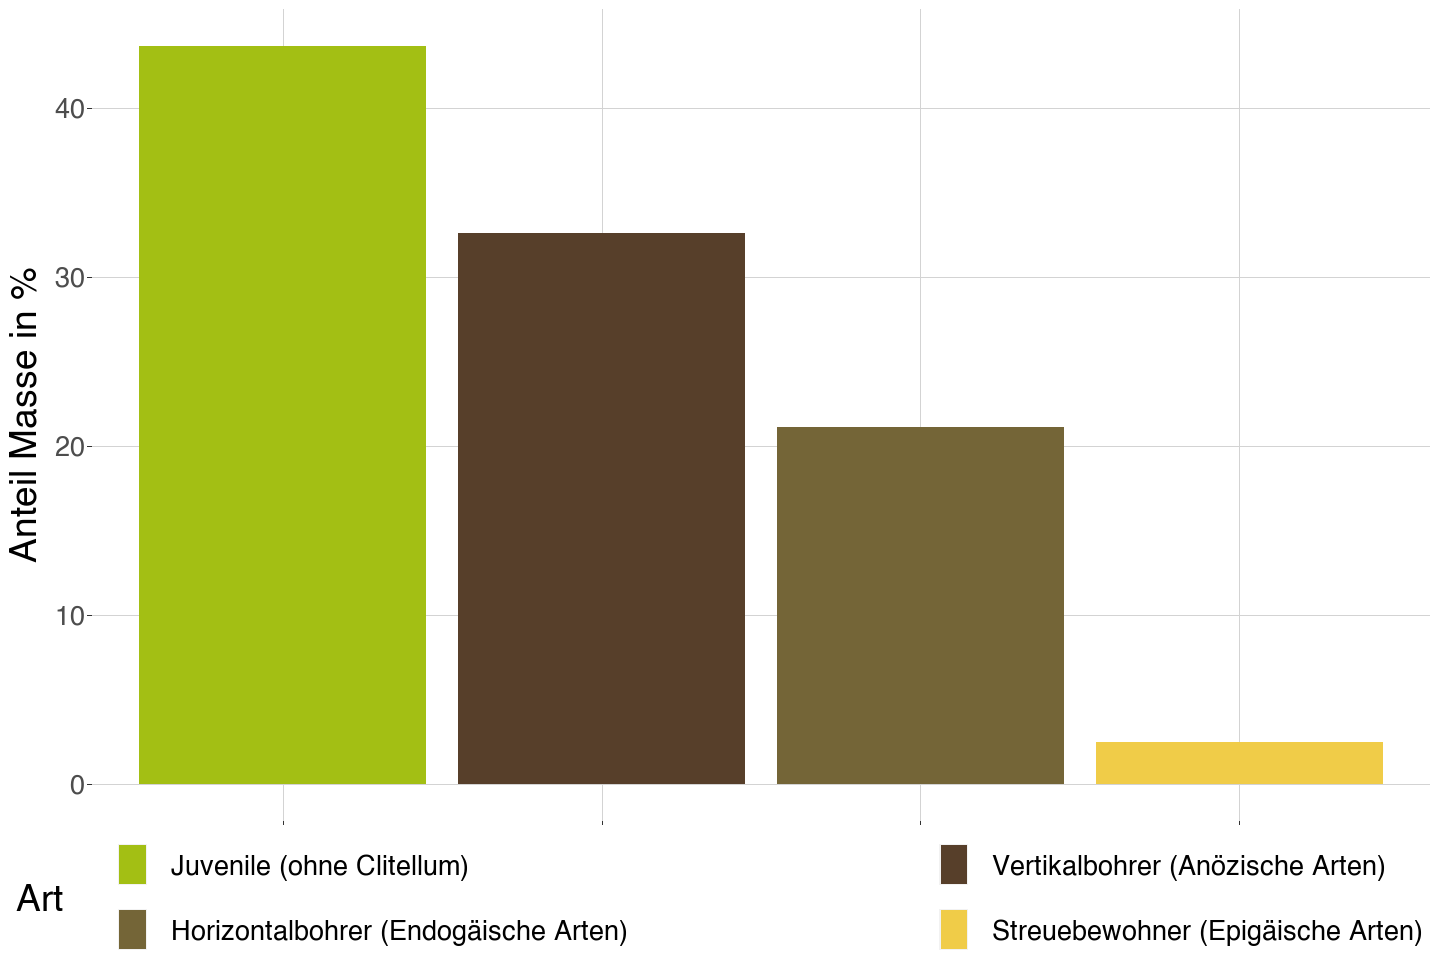

In [93]:
# just to steal the legend
data_wurm %>%
    filter(
        Gruppe == "G3",
        Einheit == "Lebendmasse_g"
    ) %>%
    mutate(
        Anteil = round(Messwert/sum(Messwert)*100,1),
        Art = reorder(Art, -Anteil)
    ) %>% 
    arrange(Anteil) %>%
    ggplot(aes(y=Anteil))+
    geom_bar(aes(x=Art, fill=Art), stat="identity")+
    scale_fill_manual(values = color_wurm) +
    plot_settings +
    labs(x = NULL) +
    labs(y = "Anteil Masse in %")+
    guides(fill = guide_legend(nrow = 2 , byrow = TRUE))+
    theme(axis.text.x = element_blank()) +
    theme(legend.margin = margin(r = -8, l = -4, unit = "cm"))



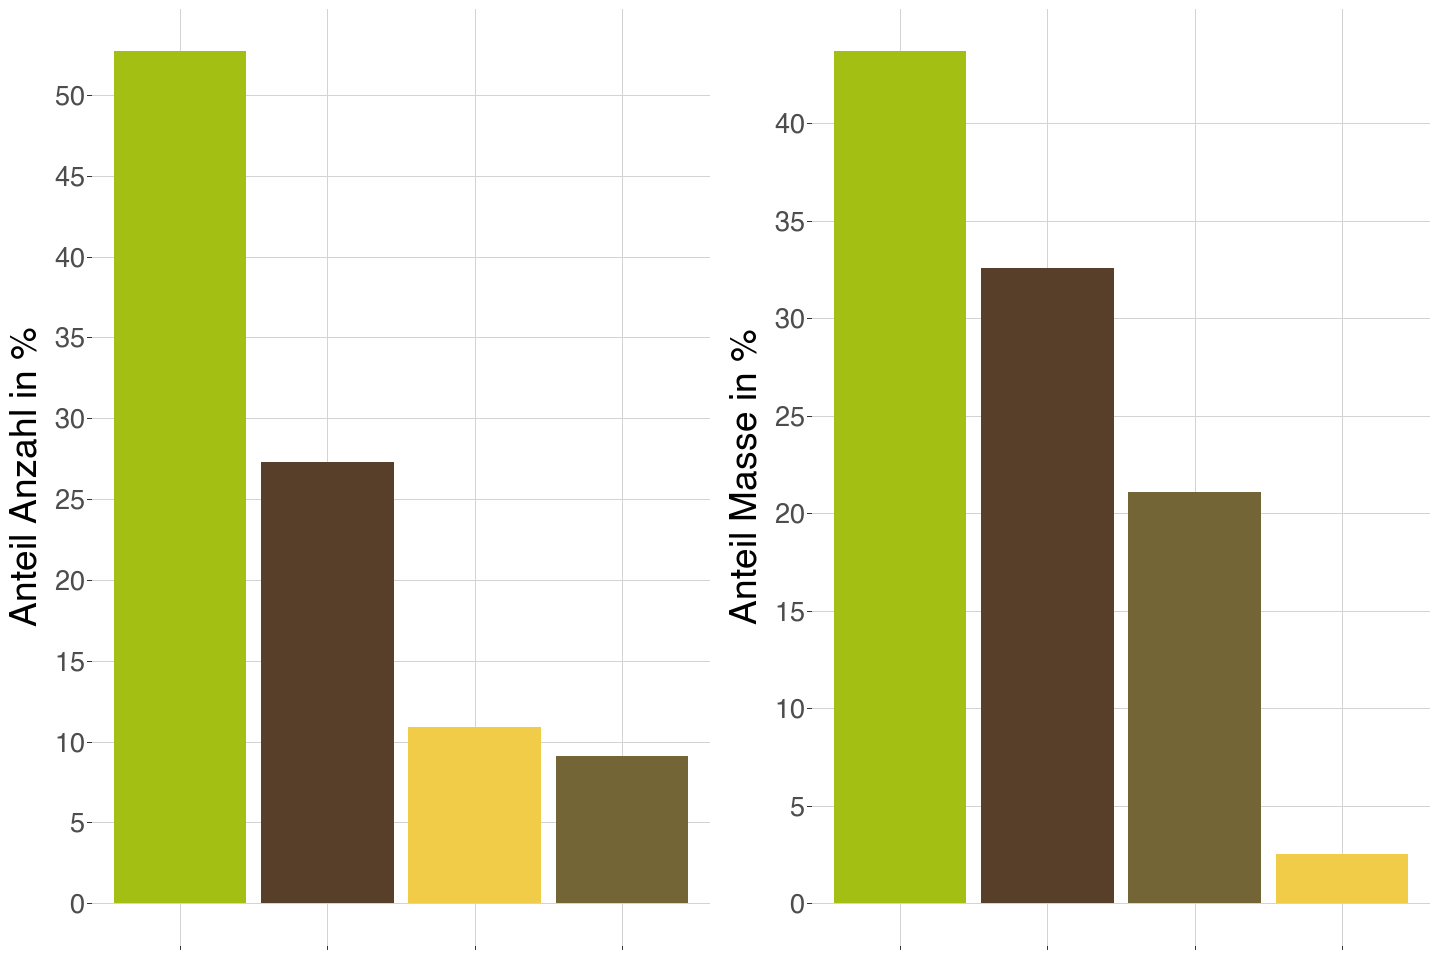

In [97]:
ratio <- list(width = 12, height = 8)
options(repr.plot.width = ratio$width, repr.plot.height = ratio$height, units = "cm", dpi = 300)

# Generate the first plot
plot1 <- data_wurm %>%
    filter(
        Gruppe == "G3",
        Einheit == "Anzahl"
    ) %>%
    mutate(
        Anteil = round(Messwert/sum(Messwert)*100,1),
        Art = reorder(Art, -Anteil)
    ) %>% 
    arrange(Anteil) %>%
    ggplot(aes(y=Anteil))+
    geom_bar(aes(x=Art, fill=Art), stat="identity")+
    scale_fill_manual(values = color_wurm) +
    plot_settings +
    labs(x = NULL) +
    labs(y = "Anteil Anzahl in %")+
    guides(fill = "none")+  # Remove the legend
    theme(axis.text.x = element_blank()) +
    scale_y_continuous(breaks = seq(0, 50, 5))

# Generate the second plot
plot2 <- data_wurm %>%
    filter(
        Gruppe == "G3",
        Einheit == "Lebendmasse_g"
    ) %>%
    mutate(
        Anteil = round(Messwert/sum(Messwert)*100,1),
        Art = reorder(Art, -Anteil)
    ) %>% 
    arrange(Anteil) %>%
    ggplot(aes(y=Anteil))+
    geom_bar(aes(x=Art, fill=Art), stat="identity")+
    scale_fill_manual(values = color_wurm) +
    plot_settings +
    labs(x = NULL) +
    labs(y = "Anteil Masse in %")+
    guides(fill = guide_legend(nrow = 2 , byrow = TRUE))+
    guides(fill = "none")+  # Remove the legend
    theme(axis.text.x = element_blank()) +
    scale_y_continuous(breaks = seq(0, 40, 5))

# Arrange the plots
plot <- grid.arrange(plot1, plot2, ncol=2)



ggsave("./plots/Wurm_winter_Box.png", width = ratio$width, height = ratio$height, units = "cm", dpi = 300)

### C/N Analyse

In [63]:
# Einlesen der Daten
data_cn <- read.csv("./data/raw/CN/CN.csv") %>% 
mutate(
    Gruppe = Gruppe %>% as.factor()
) %>% 
select(
    Gruppe, Humusgehalt, C.N
) %>% 
pivot_longer(
    cols = -c(1), 
    names_to = "typ", 
    values_to = "Messwert"
) %>%
mutate(
    Messwert = Messwert %>% round(1)
)

data_cn

Gruppe,typ,Messwert
<fct>,<chr>,<dbl>
G1,Humusgehalt,5.0
G1,C.N,11.0
G2,Humusgehalt,14.5
G2,C.N,15.3
G3,Humusgehalt,4.8
G3,C.N,10.8
G4,Humusgehalt,5.4
G4,C.N,10.8
G5,Humusgehalt,5.8


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


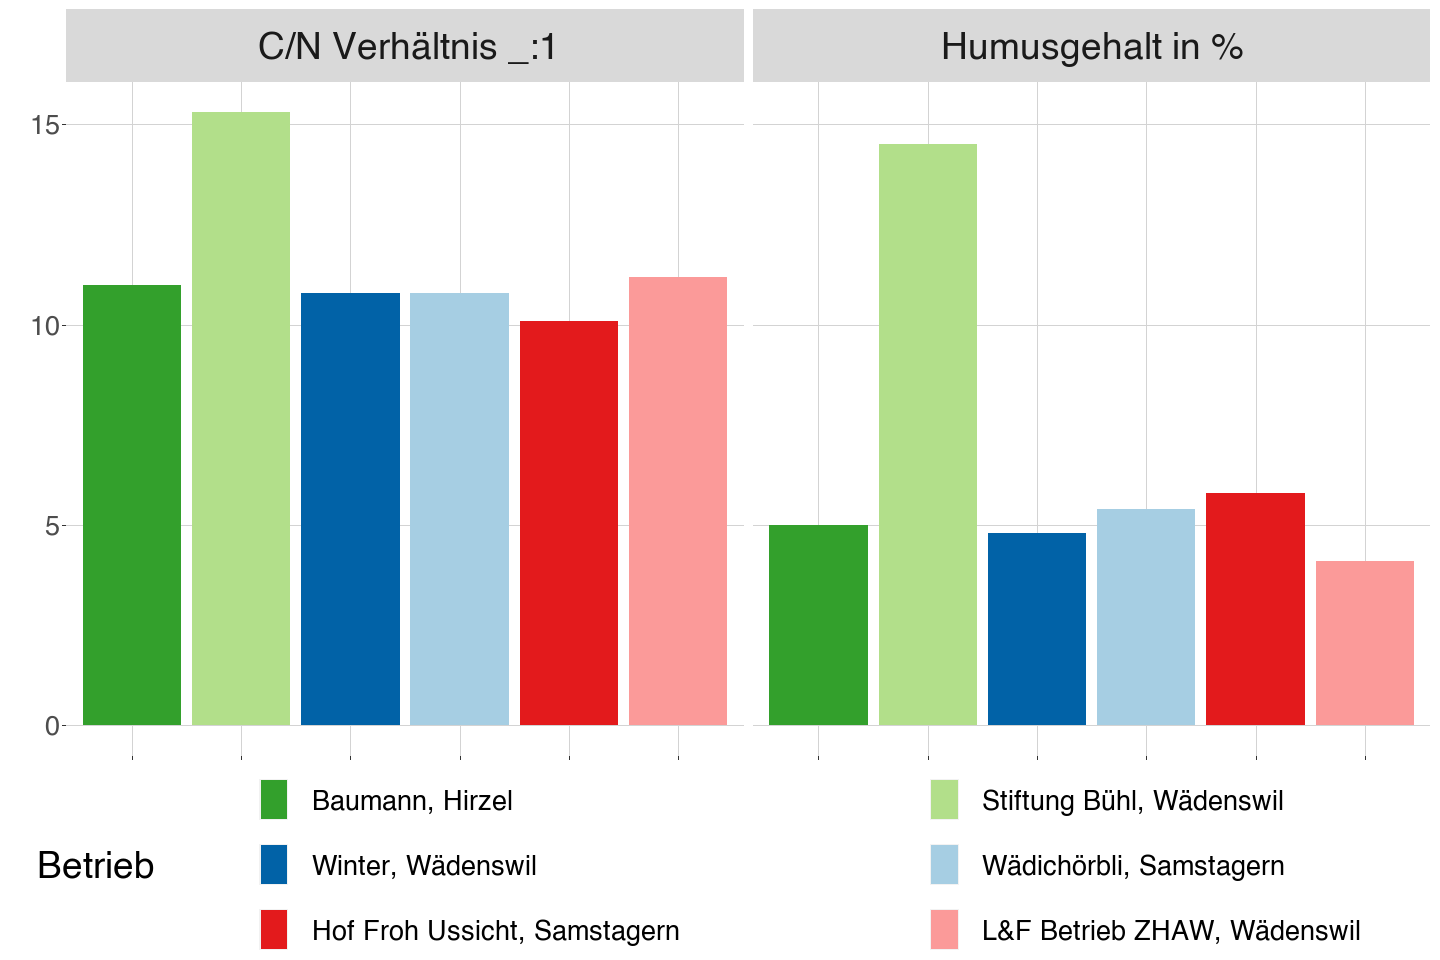

In [64]:
new_labels_facet <- c("C.N" = "C/N Verhältnis _:1", "Humusgehalt" = "Humusgehalt in %")

ratio <- list(width = 12, height = 8)
options(repr.plot.width = ratio$width, repr.plot.height = ratio$height, units = "cm", dpi = 300)

data_cn %>% 
    ggplot(aes(x = Gruppe, y = Messwert)) +
    geom_bar(aes(fill = Gruppe), stat = "identity") +
    scale_fill_manual(values = group_colors) + 
    facet_grid(
        cols = vars(typ),
        labeller = labeller(typ = new_labels_facet)
    ) +
    guides(fill = guide_legend(nrow = length(group_names)/2 , byrow = TRUE)) +
    scale_fill_manual(values = group_colors, labels = group_names, name = "Betrieb") +
    plot_settings +
    labs(x = NULL) +
    labs(y = NULL) +
    theme(axis.text.x = element_blank()) +
    theme(legend.margin = margin(r = -6, l = -3, unit = "cm")) +
    theme(strip.text = element_text(size = 28))

ggsave("./plots/cn.png", width = ratio$width, height = ratio$height, units = "cm", dpi = 300)